Домашнее задание
Каждый студент получает 3 файла train_датасет.npy, test_датасет_open.npy, test_датасет_closed.npy. Каждый файл содержит словарь с признаками, один из признаков - Class. Также каждый студент получает 2 классификатора из списка (kNN, LogReg, SVM, NeuralNetworks). Задание состоит в подборе параметров классификаторов на обучающей выборке и проверке качества на тестовой выборке. Дополнительные баллы можно получить за хорошие результаты

Требуется.

1. Выполнить подбор параметров моделей на обучающем датасете. Оценить качество модели с помощью метода кросс-валидации

2. Попробовать улучшить модель. Для улучшения можно использовать следующие методы:
- Нормализация данных
- Подбор гиперпараметров моделей
- Уменьшение размерности данных
- Другие методы

Каждый раз проверять качество с помощью кросс-валидации

3. Сделать выводы, какие методы улучшения работают, какие нет. Посчитать accuracy лучших моделей на открытом датасете.

4. На полученных моделях построить ROC кривые для открытого тестового множества. Сравнить полученные модели между собой. Какая лучше работает, сделать предположение почему. Для построения ROC кривой для числа классов больше, чем 2, воспользуйтесь [многоклассовый ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) и методом predict_proba

Результат выполнения задания
- jupyter ноутбук Task2_Фамилия выполненными пунктами 1-4.
- файлы Task2_Фамилия_алгоритм1.npy Task2_Фамилия_Имя_алгоритм2.npy с результатами классификации на закрытом тесте, где алгоритм1 - ваш первый метод, алгоритм2 - ваш второй метод

Оценка за задание. 
- Пункты 1-4 выполнены, результаты accuracy не выше бейзлайнов для каждого метода - 2.
- Пункты 1-4 выполнены, и хотя бы один результат выше бейзлайна - 2,5.
- Пункты 1-4 выполнены, и хотя бы один результат лучший среди всех работ для данного метода для данного датасета - 2,5 + 1 экстра балл.
- Пункты 1-4 выполнены, и хотя бы один результат лучший среди всех работ для данного датасета - 2,5 + 2 экстра балла.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import RFECV

from mlxtend.plotting import plot_decision_regions

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataTrain = np.load("C:\\Users\\marin\\data\\train_fruits.npy",allow_pickle=True).item()
dataTestOpen = np.load("C:\\Users\\marin\\data\\test_fruits_open.npy", allow_pickle=True).item()
dataTestClosed = np.load("C:\\Users\\marin\\data\\test_fruits_closed.npy", allow_pickle=True).item()
                         
train = pd.DataFrame(dataTrain)
test_open = pd.DataFrame(dataTestOpen)
test_closed = pd.DataFrame(dataTestClosed)

In [4]:
X_train = train.drop(['Class'], axis = 1)
y_train = train['Class']
X_test_open = test_open.drop(['Class'], axis = 1)
y_test_open = test_open['Class']
X_test_closed = test_closed

1. Подбор параметров моделей на обучающем датасете. Оценка качества модели с помощью метода кросс-валидации

In [5]:
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f'LR cross-validation scores: {lr_scores}')
print(f'LR average cross-validation scores: {np.mean(lr_scores)}')

svm = SVC()
svm_scores = cross_val_score(svm, X_train, y_train, cv=5)
print(f'SVM cross-validation scores: {svm_scores}')
print(f'SVM average cross-validation scores: {np.mean(svm_scores)}')

LR cross-validation scores: [0.54166667 0.58333333 0.5        0.55       0.525     ]
LR average cross-validation scores: 0.5399999999999999
SVM cross-validation scores: [0.61666667 0.56666667 0.59166667 0.625      0.61666667]
SVM average cross-validation scores: 0.6033333333333333


2. Улучшение модели

In [6]:
# normalisation
print('StandartScaler')
scaler_1 = StandardScaler()
scaler_1.fit(X_train)
X_train_1 = scaler_1.transform(X_train)
X_test_open_1 = scaler_1.transform(X_test_open)
X_test_closed_1 = scaler_1.transform(X_test_closed)

lr_scores_1 = cross_val_score(LogisticRegression(), X_train_1, y_train, cv=5)
print(f'LR cross-validation scores: {lr_scores_1}')
print(f'LR average cross-validation scores: {np.mean(lr_scores_1)}')

svm_scores_1 = cross_val_score(SVC(), X_train_1, y_train, cv=5)
print(f'SVM cross-validation scores: {svm_scores_1}')
print(f'SVM average cross-validation scores: {np.mean(svm_scores_1)} \n')

print('MinMaxScaler')
scaler_2 = MinMaxScaler()
scaler_2.fit(X_train)
X_train_2 = scaler_2.transform(X_train)
X_test_open_2 = scaler_2.transform(X_test_open)
X_test_closed_2 = scaler_2.transform(X_test_closed)

lr_scores_2 = cross_val_score(LogisticRegression(), X_train_2, y_train, cv=5)
print(f'LR cross-validation scores: {lr_scores_2}')
print(f'LR average cross-validation scores: {np.mean(lr_scores_2)}')

svm_scores_2 = cross_val_score(SVC(), X_train_2, y_train, cv=5)
print(f'SVM cross-validation scores: {svm_scores_2}')
print(f'SVM average cross-validation scores: {np.mean(svm_scores_2)}')

StandartScaler
LR cross-validation scores: [0.94166667 0.91666667 0.925      0.89166667 0.9       ]
LR average cross-validation scores: 0.915
SVM cross-validation scores: [0.925      0.9        0.88333333 0.9        0.90833333]
SVM average cross-validation scores: 0.9033333333333333 

MinMaxScaler
LR cross-validation scores: [0.91666667 0.89166667 0.84166667 0.86666667 0.85      ]
LR average cross-validation scores: 0.8733333333333333
SVM cross-validation scores: [0.89166667 0.91666667 0.89166667 0.89166667 0.9       ]
SVM average cross-validation scores: 0.8983333333333334


In [7]:
# hyperparameters tuning
parameters = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C':[0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'class_weight':['balanced', None]}
clfs_1 = GridSearchCV(LogisticRegression(), param_grid = parameters, cv = 5)
clfs_1.fit(X_train_1, y_train)
print(f'LR best parametrs: {clfs_1.best_params_}')
print(f'LR best score: {clfs_1.best_score_}')

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C':[0.01, 0.1, 1, 10],
              'gamma':[1, 10, 100],
              'class_weight':['balanced', None]}
clfs_2 = GridSearchCV(SVC(), param_grid = parameters, cv = 5)
clfs_2.fit(X_train_1, y_train)
print(f'SVM best parametrs: {clfs_2.best_params_}')
print(f'SVM best score: {clfs_2.best_score_}')

LR best parametrs: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
LR best score: 0.9233333333333332
SVM best parametrs: {'C': 0.1, 'class_weight': None, 'gamma': 1, 'kernel': 'linear'}
SVM best score: 0.9199999999999999


In [8]:
# dimensionality reduction
print('PCA')
pca = PCA(n_components=20)
X_train_PCA = pca.fit_transform(X_train_1)
X_test_open_PCA = pca.transform(X_test_open_1)
X_test_closed_PCA = pca.transform(X_test_closed_1)

lr_pca = clfs_1.best_estimator_
lr_scores_3 = cross_val_score(lr_pca, X_train_PCA, y_train, cv=5)
print(f'LR cross-validation scores with PCA: {lr_scores_3}')
print(f'LR average cross-validation scores with PCA: {np.mean(lr_scores_3)}')

svm_pca = clfs_2.best_estimator_
svm_scores_3 = cross_val_score(svm_pca, X_train_PCA, y_train, cv=5)
print(f'SVM cross-validation scores with PCA: {svm_scores_3}')
print(f'SVM average cross-validation scores with PCA: {np.mean(svm_scores_3)} \n')

print('LDA')
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_1, y_train)
X_train_LDA = lda.transform(X_train_1)
X_test_open_LDA = lda.transform(X_test_open_1)
X_test_closed_LDA = lda.transform(X_test_closed_1)

lr_lda = clfs_1.best_estimator_
lr_scores_4 = cross_val_score(lr_pca, X_train_LDA, y_train, cv=5)
print(f'LR cross-validation scores with LDA: {lr_scores_4}')
print(f'LR average cross-validation scores with LDA: {np.mean(lr_scores_4)}')

svm_lda = clfs_2.best_estimator_
svm_scores_4 = cross_val_score(svm_lda, X_train_LDA, y_train, cv=5)
print(f'SVM cross-validation scores with LDA: {svm_scores_4}')
print(f'SVM average cross-validation scores with LDA: {np.mean(svm_scores_4)} \n')

print('RFECV')
rfe_selector_1 = RFECV(estimator=LogisticRegression(), step=1, cv = 5)
rfe_selector_1.fit(X_train_1, y_train)
rfe_support_1 = rfe_selector_1.get_support()
X_train_rfe_1 = X_train_1[:,rfe_support_1]
X_test_open_rfe_1 = X_test_open_1[:,rfe_support_1]
X_test_closed_rfe_1 = X_test_closed_1[:,rfe_support_1]

lr_RFE = clfs_1.best_estimator_
lr_scores_5 = cross_val_score(lr_RFE, X_train_rfe_1, y_train, cv=5)
print(f'LR cross-validation scores with RFE: {lr_scores_5}')
print(f'LR average cross-validation scores with RFE: {np.mean(lr_scores_5)}')

rfe_selector_2 = RFECV(estimator=SVC(kernel="linear"), step=1, cv = 5)
rfe_selector_2.fit(X_train_1, y_train)
rfe_support_2 = rfe_selector_2.get_support()
X_train_rfe_2 = X_train_1[:,rfe_support_2]
X_test_open_rfe_2 = X_test_open_1[:,rfe_support_2]
X_test_closed_rfe_2 = X_test_closed_1[:,rfe_support_2]

svm_RFE = clfs_2.best_estimator_
svm_scores_5 = cross_val_score(svm_RFE, X_train_rfe_2, y_train, cv=5)
print(f'SVM cross-validation scores with RFE: {svm_scores_5}')
print(f'SVM average cross-validation scores with RFE: {np.mean(svm_scores_5)}')

PCA
LR cross-validation scores with PCA: [0.91666667 0.925      0.90833333 0.88333333 0.93333333]
LR average cross-validation scores with PCA: 0.9133333333333333
SVM cross-validation scores with PCA: [0.925      0.95833333 0.90833333 0.9        0.9       ]
SVM average cross-validation scores with PCA: 0.9183333333333333 

LDA
LR cross-validation scores with LDA: [0.94166667 0.95833333 0.925      0.88333333 0.90833333]
LR average cross-validation scores with LDA: 0.9233333333333335
SVM cross-validation scores with LDA: [0.94166667 0.96666667 0.925      0.925      0.91666667]
SVM average cross-validation scores with LDA: 0.9349999999999999 

RFECV
LR cross-validation scores with RFE: [0.93333333 0.90833333 0.90833333 0.9        0.925     ]
LR average cross-validation scores with RFE: 0.915
SVM cross-validation scores with RFE: [0.925      0.95833333 0.90833333 0.9        0.9       ]
SVM average cross-validation scores with RFE: 0.9183333333333333


3. Выводы и accuracy лучших моделей на открытом датасете.

Уже нормализация данных с помощью метода StandartScaler привела к значительному улучшению работы моделей (c 0.54 до 0.915 в случае LR, с 0.6 до 0.903 в случае SVM)

Настройка гиперпарамметров помогла еще улучшить параметры моделей:
набор характеристик 'C'= 100, 'class_weight' = 'balanced', 'penalty'= 'l2', 'solver'= 'liblinear' повысил accuracy LR до 0.923;
набор характеристик 'C'= 0.1, 'class_weight'= None, 'gamma'= 1, 'kernel'= 'linear' повысил accuracy SVM до 0.919.

Понижение размерности данных сработало наилучшмм образом при использовании LDA на SVM (accuracy выросла до 0.935). В других случаях улучшения качества не было заметно.

На открытом тесте данное сочетание нормализации, гиперпараметров и отбора признаков также выдало наилучший результат

In [9]:
lr_best = clfs_1.best_estimator_.fit(X_train_1, y_train)
svm_best =clfs_2.best_estimator_.fit(X_train_LDA, y_train)

print(f"Best LR accuracy for open test: {lr_best.score(X_test_open_1, y_test_open)}")
print(f"Best SVM accuracy for open test: {svm_best.score(X_test_open_LDA, y_test_open)}")

Best LR accuracy for open test: 0.9191919191919192
Best SVM accuracy for open test: 0.9090909090909091


4. ROC кривые для открытого тестового множества и сравнение моделей между собой.

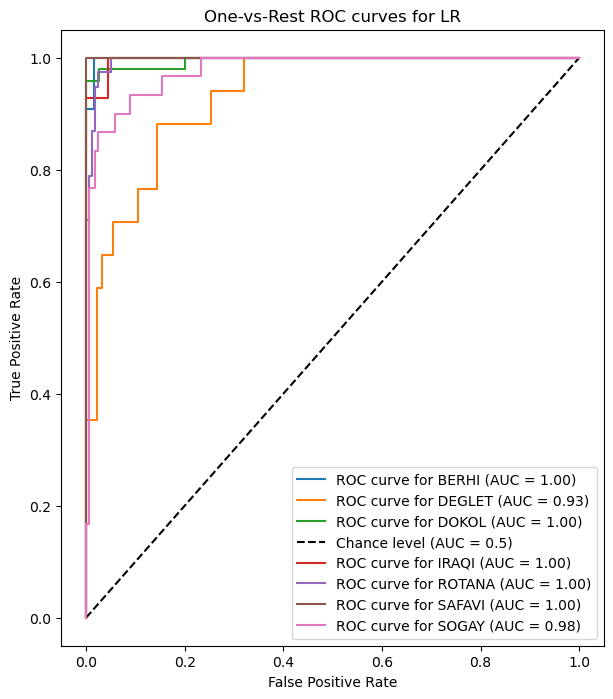

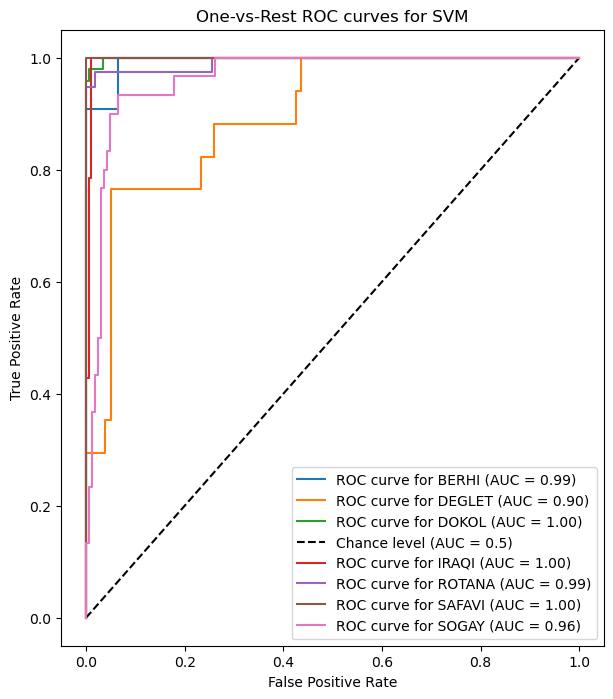

In [10]:
target_names = np.unique(y_test_open)
label_binarizer = LabelBinarizer().fit(y_train)
y_test_binarize = label_binarizer.transform(y_test_open)

y_test_open_lr = clfs_1.best_estimator_.decision_function(X_test_open_1)
y_test_open_svm = clfs_2.best_estimator_.decision_function(X_test_open_LDA)

def display(y_score, clf):
    fig, ax = plt.subplots(figsize=(7, 8))

    for class_id in range(7):
        RocCurveDisplay.from_predictions(
            y_test_binarize[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {target_names[class_id]}",
            ax=ax,
            plot_chance_level=(class_id == 2),
        )

    ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"One-vs-Rest ROC curves for {clf}",
    )

    plt.show()
    
display(y_test_open_lr, 'LR')
display(y_test_open_svm, 'SVM')

Как можно видеть из построенных многоклассовых One-vs-Rest ROC-кривых, на открытом тесте логистическая регрессия работает немного лучше, чем SVM (лучше определяет классы DEGLET, ROTANA и SOGAY). Возможно причина этого в том что классы плохо разделимы и SVM опирается на большое число опорных объектов.

In [11]:
y_test_closed_lr = clfs_1.best_estimator_.predict(X_test_closed_1)
y_test_closed_svm = clfs_2.best_estimator_.predict(X_test_closed_LDA)

np.save('Task2_Korneva_LogisticRegression.npy',y_test_closed_lr)
np.save('Task2_Korneva_SVM.npy',y_test_closed_svm)